# Time Series Handson

In [1]:
# trend
# seasonality
# Residue,error(Noise)

# Components of Time Series:
#     1) TREND: is a movement to relatively higher or lower values over a long period of time.
    
#         uptrend - exibits upper  values
        
#         down trend - exibits lower values
        
#         when there is no trend - horizontal line or stationary trend
        
#     2) SEASONALITY: The repeating patterns or cycles of behaviour over time (fixed intervals)
#         Ex: Mangoes sales in summers
    
#     3) Noise or Irregularity or Residual: Some random variation that no one can predict
#         Ex: floods, Earthquakes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarning("ignore")

In [3]:
data=pd.read_csv("AirPassengers.csv")

In [4]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
data["Month"]=pd.to_datetime(data["Month"])

In [8]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
data.set_index("Month",inplace=True)

In [11]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

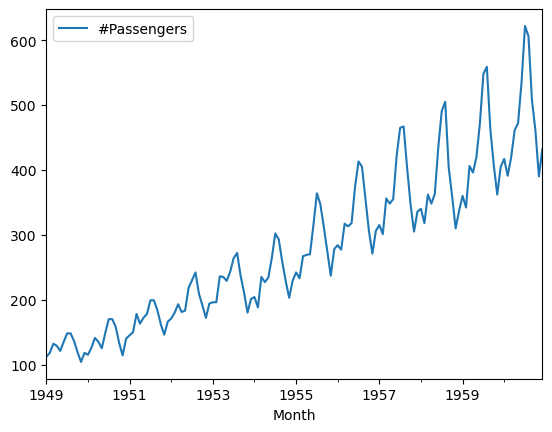

In [12]:
data.plot()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
decomposition=seasonal_decompose(data["#Passengers"])

Figure(640x480)


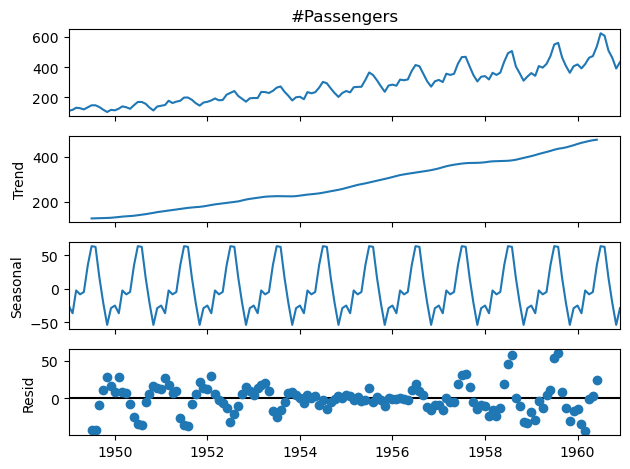

In [15]:
print(decomposition.plot())

In [16]:
# Stationarity of data- if the mean and standard Deviation of the data is constant

In [17]:
# proof whether the data is stationary or not

In [18]:
# Hypothesis Testing
# ad-fuller Test-
# H0(null hypothesis)= data is non stationary
# HA(alternate hypothesis)=data is stationary

# if p value is more than 0.05 accept the null hypothesis

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result=adfuller(data)

In [21]:
pval=result[1]
pval

0.9918802434376411

In [22]:
# as the p values is more than 0.05, data is non stationary

In [23]:
# Now we have to make the data stationary so that we can appply the ARIMA

# Let's MAke the Data Stationary

In [24]:
# Rolling mean
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

In [25]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


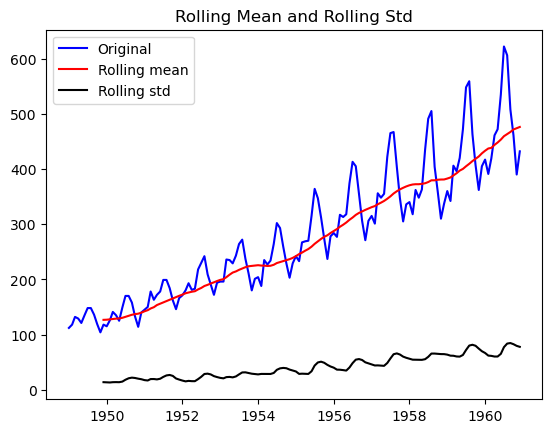

In [26]:
plt.plot(data,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [27]:
# Transformation
df_log=np.log(data)

In [28]:
df_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [29]:
mean_log=df_log.rolling(window=12).mean()
std_log=df_log.rolling(window=12).std()

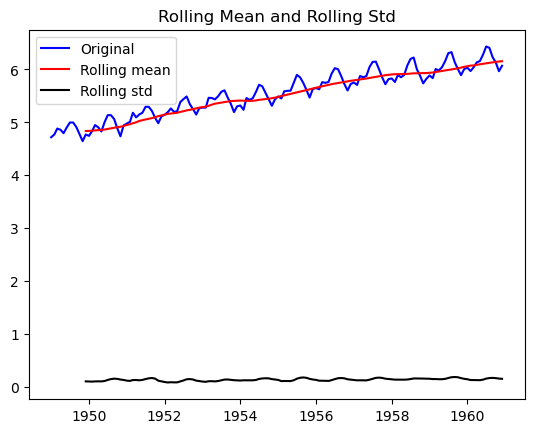

In [30]:
plt.plot(df_log,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [31]:
result=adfuller(df_log)  #again checking the stationarity with hypothesis Test
result[1]

0.4223667747703897

In [32]:
new_data=df_log-mean_log

In [33]:
new_data

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [34]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

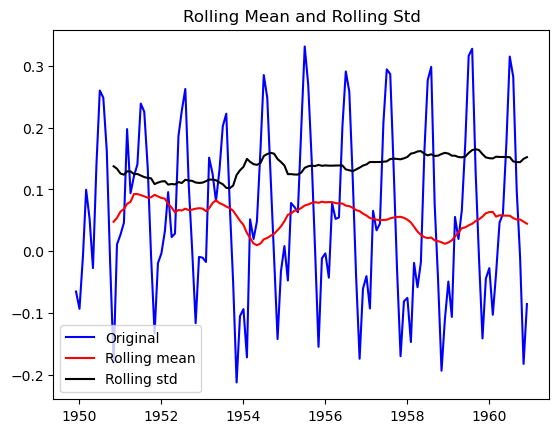

In [35]:
plt.plot(new_data,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [37]:
new_data

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [38]:
new_data.dropna(inplace=True)

In [39]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [40]:
# lets check the stationarity

In [41]:
result = adfuller(new_data)
result[1]

0.02223463000124264

# Model Building 

# ARIMA

ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) are two popular models for analyzing and forecasting time series data.

ARIMA is a statistical model that uses the past values of a time series to predict its future values. It has three components: autoregression (AR), differencing (I), and moving average (MA).

In [42]:
# p- moving averages-- ?
# d= differencing-----1
# q= autoregressive----?

In [43]:
# Split the data for training and Testing

In [44]:
train=new_data.iloc[:120,:]["#Passengers"]
test=new_data.iloc[120:,:]["#Passengers"]

In [45]:
train

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1959-07-01    0.316430
1959-08-01    0.327838
1959-09-01    0.128057
1959-10-01   -0.011315
1959-11-01   -0.141406
Name: #Passengers, Length: 120, dtype: float64

In [46]:
test

Month
1959-12-01   -0.044481
1960-01-01   -0.027530
1960-02-01   -0.103067
1960-03-01   -0.036530
1960-04-01    0.046332
1960-05-01    0.060186
1960-06-01    0.175033
1960-07-01    0.315151
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, dtype: float64

In [47]:
# Model implementation

In [48]:
from statsmodels.tsa.arima.model import ARIMA

In [64]:
model= ARIMA(train,order=(7,1,7))

C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
model=model.fit()

C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1)


In [67]:
new_data.head(20)

,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
1950-05-01,-0.027529,NaN
1950-06-01,0.139881,NaN
1950-07-01,0.260184,NaN
1950-08-01,0.248635,NaN


In [68]:
new_data.tail(20)

,#Passengers,predict
Month,,
1959-05-01,0.066365,NaN
1959-06-01,0.176286,NaN
1959-07-01,0.316430,NaN
1959-08-01,0.327838,NaN
1959-09-01,0.128057,NaN
1959-10-01,-0.011315,NaN
1959-11-01,-0.141406,NaN
1959-12-01,-0.044481,-0.131586
1960-01-01,-0.027530,-0.046987


<Axes: xlabel='Month'>

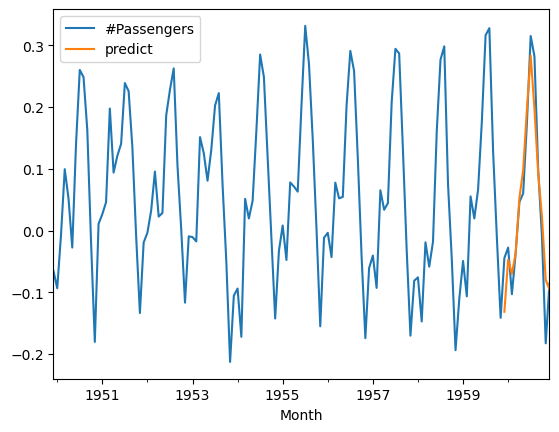

In [69]:
new_data[['#Passengers','predict']].plot()


In [ ]:
# Since the forecasting are not good, we will choose the optimal values of p,d,q

In [ ]:
# itertools

In [56]:
# we will use here itertools to get the optimal value of p,d,q
import itertools

p=range(8)
d=range(1,2)
q=range(8)
pdq_combination=list(itertools.product(p,d,q))
pdq_combination


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [58]:
len(pdq_combination)

64

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
rmse = []
order1 =[]
for pdq in pdq_combination:
    model = ARIMA(train, order = pdq)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end= len(train)+len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns=['RMSE'])


C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [63]:
results.sort_values(by="RMSE")

,RMSE
"(7, 1, 7)",0.048850
"(7, 1, 6)",0.057806
"(7, 1, 5)",0.059503
"(6, 1, 6)",0.068879
"(5, 1, 7)",0.070586
...,...
"(2, 1, 0)",0.217930
"(0, 1, 0)",0.228469
"(1, 1, 1)",0.240002
"(0, 1, 1)",0.252661


In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train,order=(7,1,7),seasonal_order=(7,1,7,12)) # X is exogeneous variable exog="column name"
model=model.fit()

C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

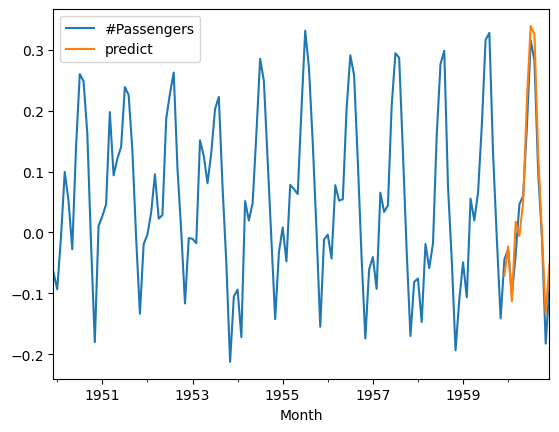

In [71]:
new_data["predict"]=model.predict(start=len(train), end=len(train)+len(test)-1)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

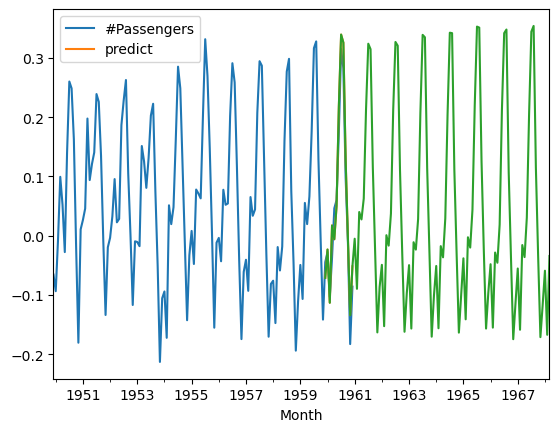

In [73]:
# Forecasting
forecast = model.forecast(steps=100) #for predicting furture
new_data.plot()
forecast.plot()